#1. 시계열 데이터

- **시계열분석 Target 데이터: 최소 시계열/시계열횡단면/패널 데이터 (횡단면 데이터 시계열분석 불가)**  
- **시계열분석 시간축: 초/분/시/일/월/년 등 (Tick 단위 이하 제외)**  

| ' | 횡단면 데이터(Cross Sectional) | 시계열 데이터(Time Series) | 시계열 횡단면 데이터(Pooled Cross Section) | 패널 데이터(Panel) |
|--------------------------------|-----------------------------------------|--------------------------------------------|------------------------------------|---------------------------------------------|
| 정의 | 특정시점 + 다수독립변수 | 다수시점 + 특정독립변수 | 다수독립변수 + 다수시점 | 다수독립변수 + 다수시점 (동일 변수 및 시점) |
| 예시 | 2016년 16개 시도의 GRDP와 최종소비 | 연도별 전국 GRDP와 최종소비 | 연도별 16개 시도의 GRDP와 최종소비 | 연도별 16개 시도의 GRDP와 최종소비 |
| 특징 | 값 독립적, 모집단 중 특정 시점 표본추출 | 값 Serial-correlation/Trend/Seasonality 등 | 시점/변수 불일치로 공백 가능 | 시점/변수 일치로 연구자들이 가장 선호 |

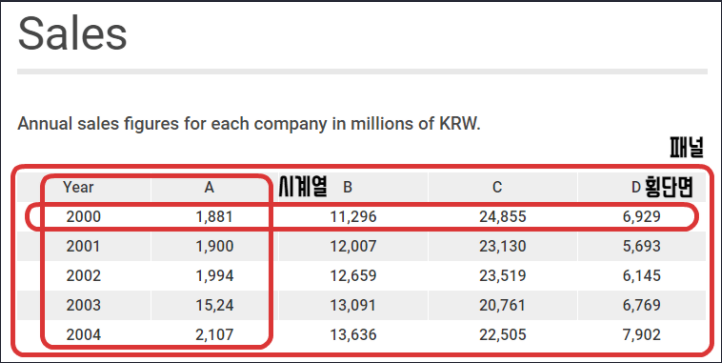

# 2. 시계열 데이터 처리

- Sequential Dataset
 - Feature의 길이: Sequence Length ( = Window Size)
 - 예측할 길이: STep
 - 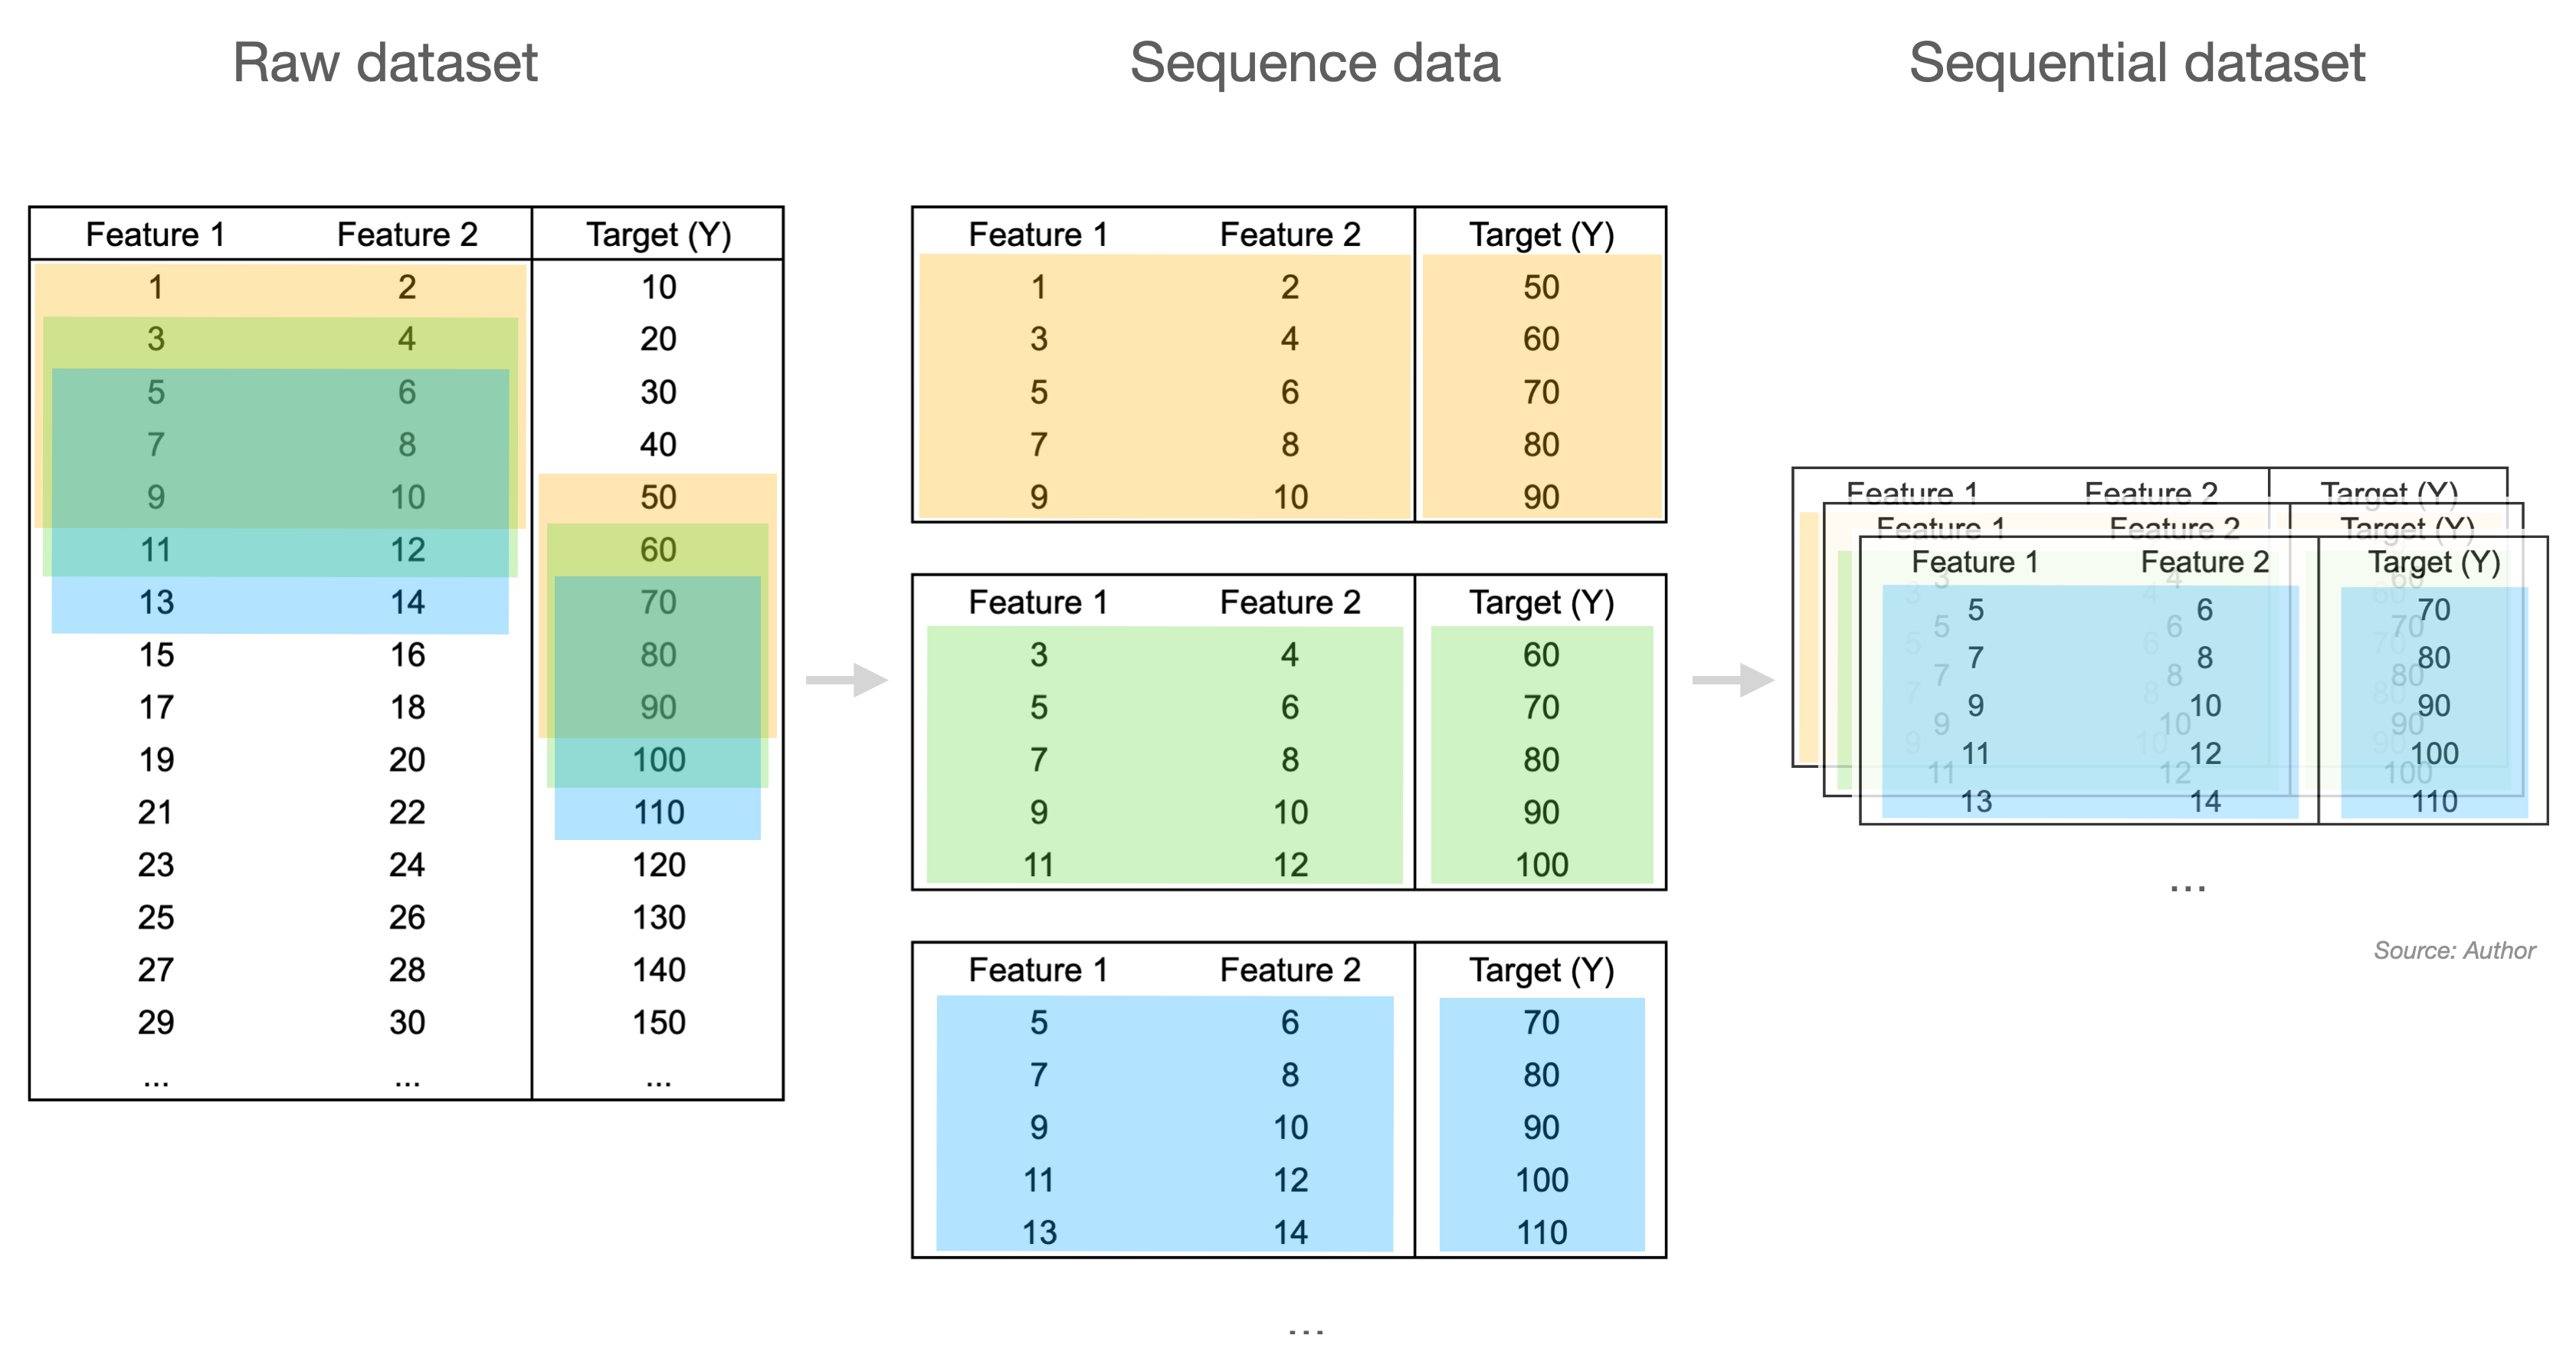

 - 예측값: 1개, step=5
 - 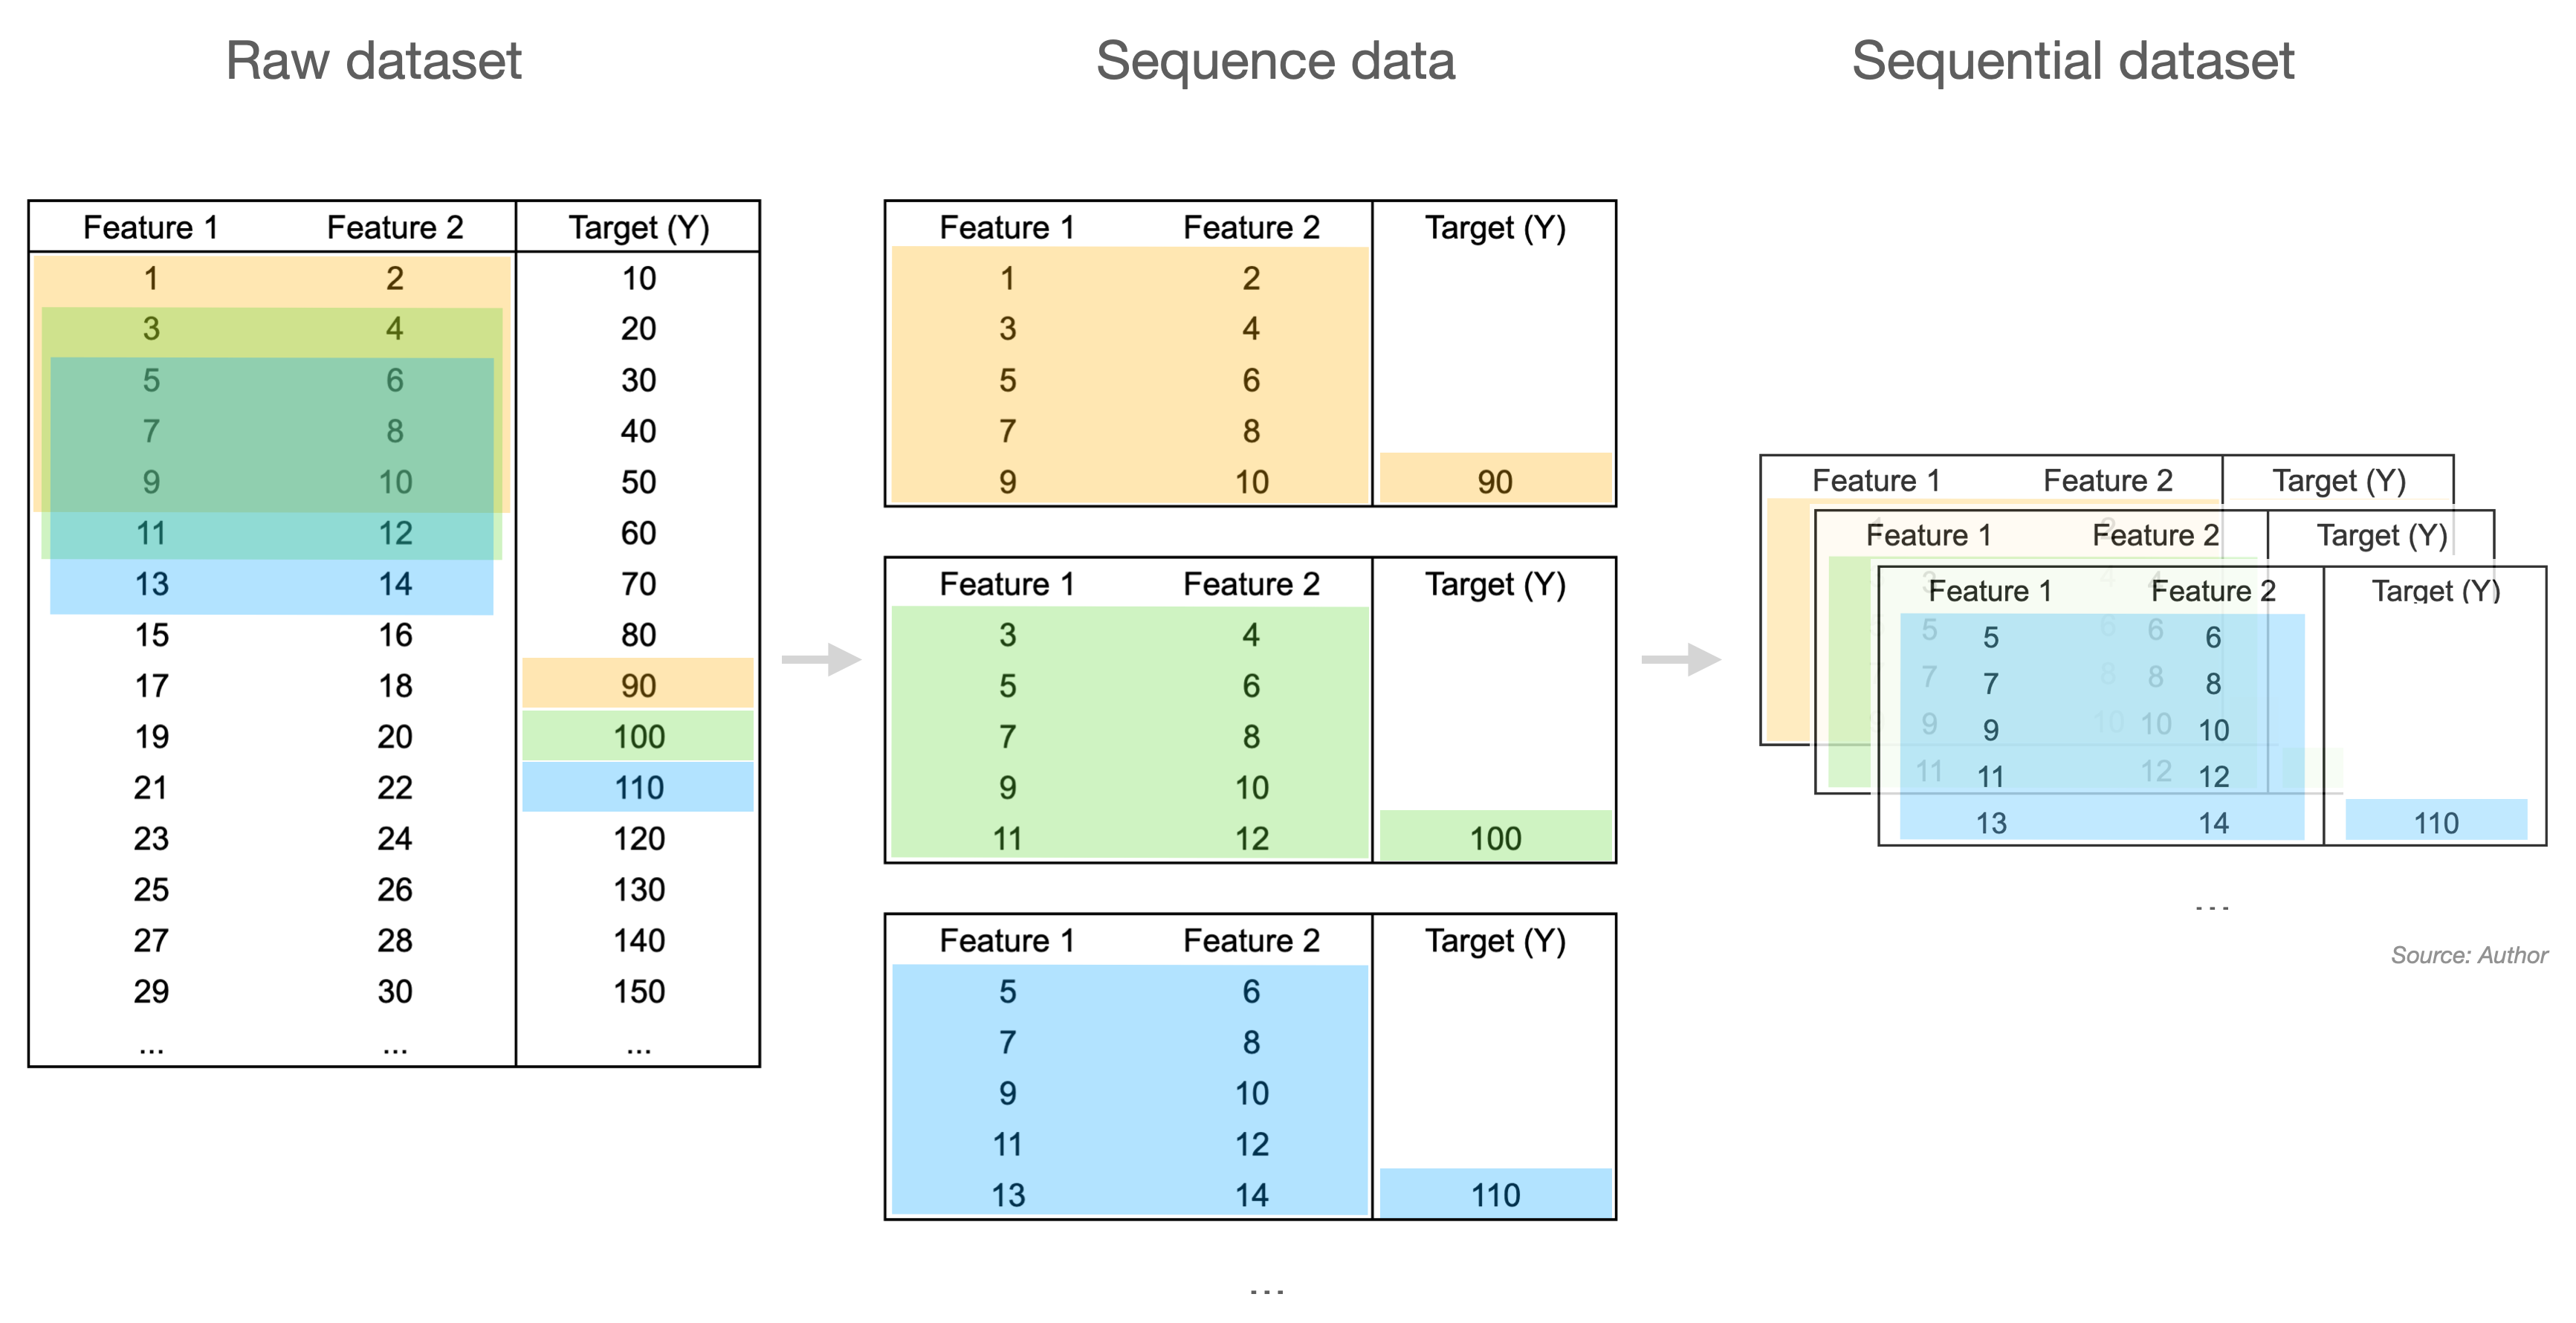

- 예제 시계열 만들기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xarr = np.array([100,200,300,400])
yarr = np.array([1,2,3,4])
cond = ([True,False,True,False])
np.where(cond,xarr,yarr) #cond True->xarr, False ->yarr

array([100,   2, 300,   4])

In [ ]:
np.random.seed(2020)
time = np.arange(30 * 12 + 1)
month_time = (time % 30) / 30

In [ ]:
time_series = 20 * np.where(month_time < 0.5,
                          np.cos(2 * np.pi * month_time),
                          np.cos(2 * np.pi * month_time) + np.random.random(361))


In [ ]:
time_series

import pandas as pd
#time_series를 데이터프레임으로 만드세요 (pd.DataFrame 함수에 넣으셔서)
ts = pd.DataFrame( time_series)

#75% train, 25% test,,,,,
ts[0:250]
ts[250:]



- 파일로 부터 읽기

In [ ]:
#AMZN.csv를 amazon으로 읽으세요
amazon = pd.read_csv( "AMZN.csv")
#amazon.Date컬럼을 pd.to_datetime함수에 넣으세요
amazon.index = pd.to_datetime(amazon["Date"])
#Date 컬럼을 지워보세요.  drop   axis=1  inplace=True
amazon.drop("Date", axis=1, inplace=True)
amazon.Close.plot()
amazon.diff().dropna()  #differencing 차분
amazon.pct_change().dropna().Close  #수익율
np.log1p( amazon.pct_change().dropna().Close )  #로그수익율

- 라이브러리로 수집하기

In [ ]:
# pykrx에서 00회사의 1년치 주가정보를 수집하세요
!pip install pykrx

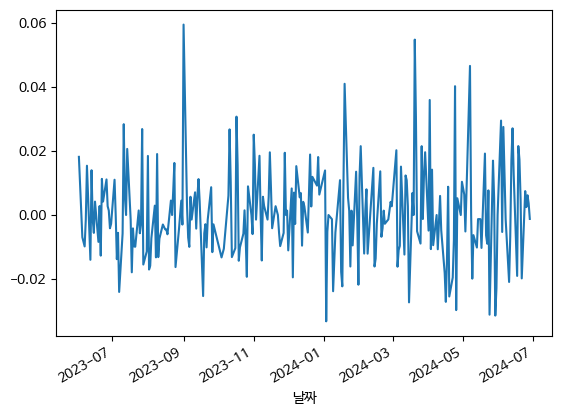

In [ ]:
from pykrx import stock
df = stock.get_market_ohlcv_by_date("20230601", "20240630", "005930")

# 종가에 대해서 로그수익율, 수익율, 차분 구한 값들을 result라는 데이터프레임으로 묶어주세요
dif = df.diff().dropna().종가
ret = df.pct_change().dropna().종가
log_ret = np.log1p( df.pct_change().dropna().종가 )
result = pd.concat(   [dif, ret, log_ret     ], axis=1 )

# 로그수익율을 그리세요 ...
result.columns = ["차분", "수익율", "로그수익율"]
result.로그수익율.plot()

# 위의 데이터프레임을 csv로 만드세요  to_csv("파일명.csv")
result.to_csv("005930.csv")


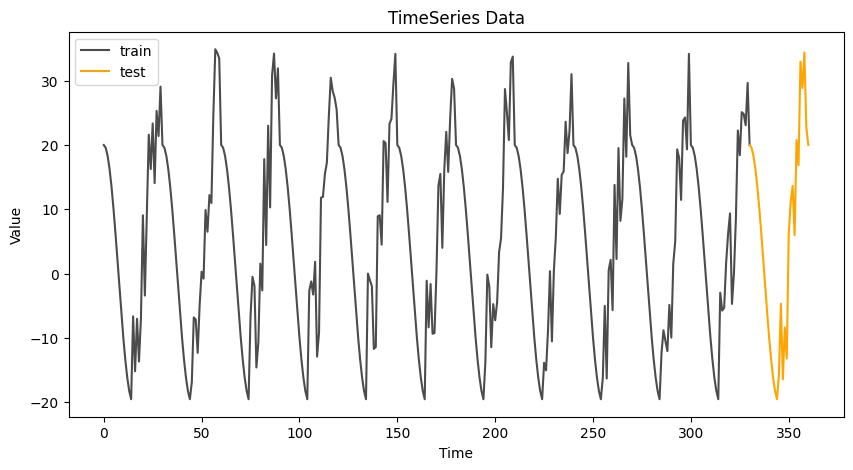

In [ ]:
plt.figure(figsize = (10, 5))
plt.title('TimeSeries Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(np.arange(0, 30 * 11 + 1), time_series[:30 * 11 + 1], color = 'black', alpha = 0.7, label = 'train') # 학습용 데이터
plt.plot(np.arange(30 * 11, 30 * 12 + 1), time_series[30 * 11:], color = 'orange', label = 'test') # 테스트용 데이터
plt.legend()

- 시계열 데이터 to X, y

In [ ]:
def make_sequence(time_series, n):  #시계열에서 1부터 n번째까지 선택해서 x로 지정, n+1번째값은 y, 이런 식으로 시계열 값을 계속 윈도우 n크기로 슬라이딩
    x_train, y_train = list(), list()

    for i in range(len(time_series)):
        x = time_series[i:(i + n)]
        if (i + n) < len(time_series):
            x_train.append(x)
            y_train.append(time_series[i + n])
        else:
            break

    return np.array(x_train), np.array(y_train)

n = 15
x_train, y_train = make_sequence(time_series, n)
x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)
print(x_train.shape)
print(y_train.shape)

(346, 15, 1)
(346, 1)


In [ ]:
from sklearn.model_selection import train_test_split

partial_x_train = x_train[:30 * 11]
partial_y_train = y_train[:30 * 11]
x_test = x_train[30 * 11:]
y_test = y_train[30 * 11:]

print('train:', partial_x_train.shape, partial_y_train.shape)
print('test:',x_test.shape, y_test.shape)

train: (330, 15, 1) (330, 1)
test: (16, 15, 1) (16, 1)


In [ ]:
test_arr = np.arange(100)
a, b = make_sequence(test_arr, 15)

for i in range(1, 4):
    print(a[i],'|', b[i])


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] | 16
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] | 17
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] | 18


#2. 시계열 분석

-정상 프로세스 VS 비정상 프로세스
 - 정상 프로세스(Stationary Process): 시계열 자료의 평균과 분산이 시간에 관계없이 일정한 겨우 (trend나 seasonality가 없는)
 - 비정상 프로세스(Non-stationary Process): 시계열 자료의 평균과 분산이 일정하지 않은 경우

- Autocorrelation Function으로 특정 패턴이 없으면 정상 프로세스로 고려
- ACF: 자기 상관 함수, k시간 단위로 구분된 시계열의 관측치 사이의 상관계수 함수, k가 커지면 ACF는 0에 가까워짐. 시차 k에 대한 두 관측치 상관계
 - t시점의 y와 t-k시점의 y의 ACF
 - ACF가 패턴이 없거나 갑자기 떨어지는 모습->정상 시계열

- PACF(Partial ACF)
 - 부분상관(Partial Corr): 두 확률변수에 의해 다른 변수들에 나타난 상관관계를 설명한 후 남아있는 상관관계
 - PACF는 시계열 관측치 간의 상관관계, k시차에서의 '순수한' 상관관계(두 시점 사이 다른 관측치의 영향력은 제거)
 - t 시점의 y와 t-k 시점의 y의 편자기상관

- 통계적 시계열 모형
 - AR(Autoregressive) 모형: 자기 자신을 y로 하고, 시차 p인 이전 시점의 시계열 값들을 x변수로 하는 모형, 시차 p 를 하이퍼파라미터, 독립변수 간 독립성 가정 없음
 - MA 모형(Moving Average): 자기 자신이 y이고, 해당 시점과 시차 q인 과거의 white noise error들이 x변수인 모형, 하이퍼파라미터는 시차 q
 - ARMA모형(Autoregressive Moving Average): 자기 자신을 y로 하고, 이전 시점(p)의 시계열과 white noise error들을 x변수로 하는 모형, p,q가 하이퍼파라미터
 - ARIMA(Autoregressive Integrated Moving Average)모형: 위의 세 모형은 정상 프로세스에서의 경우, 비정상 프로세스는 차분을 통해 모형 적용, 차분을 d회 적용한 ARMA모형: 차분은 대체로 2회까지, 3회를 넘긴 경우 다른 모형 피팅

- ACF, PACF를 통해서 ARIMA 모형의 p,q를 결정
 - MA(q):
  - ACF: q 시차 이후 0으로 절단
  - PACF: 지수적으로 감소 소멸하는 형태
 - AR(P)
  - ACF: 지수적으로 감소 소멸하는 형태
  - PACF: p 시차 이후 0으로 절단
 - ARMA(p,q)
  - ACF: 시차 (q-p) 이후 부터 소멸
  - PACF: 시차(q-p)이후부터 소멸
  -  p + q < 2, p * q = 0, 대부분은 한 경향을 갖기 때문

- 모형 확인
 - Residuals에 대해서 ACF를 생성
 - 대부분이 영역 안에 들어오고, 40개 중 2-3개 까지는 영역 밖에 있어도 괜찮음


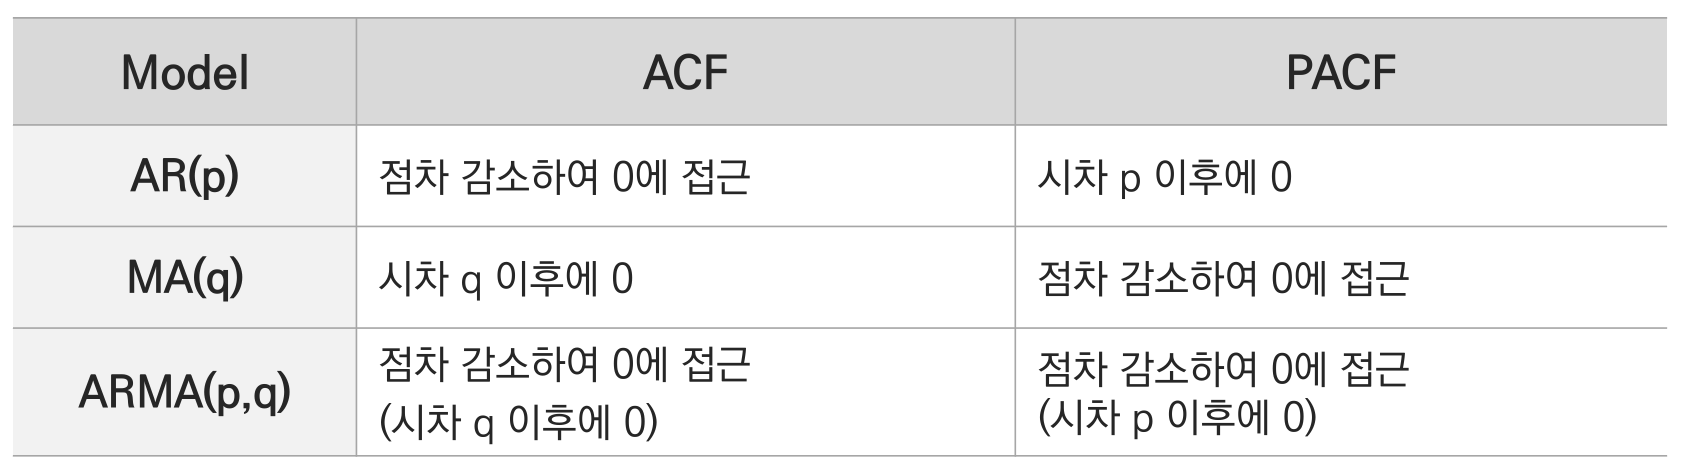

- 시계열 데이터 분해

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dates = pd.date_range('2020-01-01', periods=48, freq='M')
timestamp = np.arange(len(dates))

trend_factor = timestamp*1.1
cycle_factor = 10*np.sin(np.linspace(0, 3.14*2, 48))
seasonal_factor = 7*np.sin(np.linspace(0, 3.14*8, 48))
np.random.seed(2004)
irregular_factor = 2*np.random.randn(len(dates))
df = pd.DataFrame(  {'timeseries': trend_factor + cycle_factor + seasonal_factor + irregular_factor,'trend': trend_factor,'cycle': cycle_factor,
                   'trend_cycle': trend_factor + cycle_factor,'seasonal': seasonal_factor,'irregular': irregular_factor},
                   index=dates)



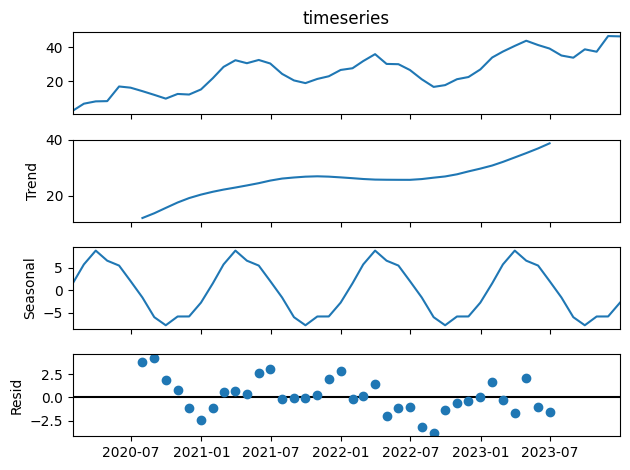

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df.timeseries, model='additive')
result.plot()
plt.show()


- 판매 데이터에 대한 ARIMA

<ipython-input-1-d4b691023c23>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = read_csv('shampoo.txt', header=0, parse_dates=[0], index_col=0)


       Sales
Month       
1-01   266.0
1-02   145.9
1-03   183.1
1-04   119.3
1-05   180.3


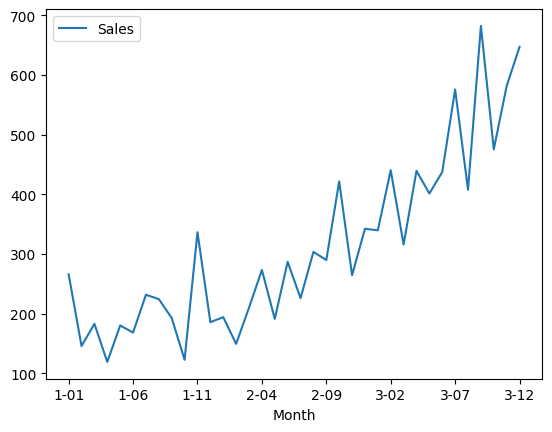

In [ ]:
from pandas import read_csv
import datetime
from matplotlib import pyplot

series = read_csv('shampoo.txt', header=0, parse_dates=[0], index_col=0)
print(series.head())
series.plot()
pyplot.show()

<ipython-input-15-98e5f2e0a1f0>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = read_csv('shampoo.txt', header=0, parse_dates=[0], index_col=0)


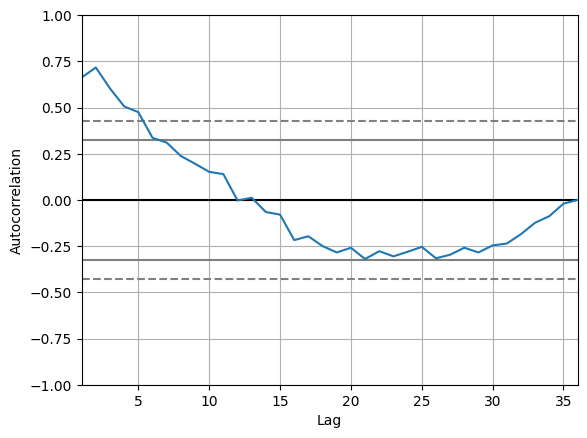

In [ ]:
autocorrelation_plot(series)
pyplot.show()

#3.ARIMA 모형 적용

- 정상성(Stationarity)
 - 시계열 자료가 정상성이 결여된 경우 모형의 성능이 좋지 않을 수 있음
 - 정상성이란: 시계열 자료가 뚜렷한 트렌드 없이 값의 변동이 시간의 흐름에 따라 일정, stationarity
 - 정상성 여부의 검정: Dickey Fuller의 단위근 검정
  - 귀무가설: 비정상시계열 (단위근 있다)
  - 대립가설: 정상시계열(단위근 없다)

 - 비정상시계열인 경우: 시계열 자료 차분(differencing)하여 정상시계열로 변환 후 피팅

 - 주가: 일반적으로 비정상 시계열, 로그수익율인 경우 정상시계열이 됨
 - 수익율 = 현재 가격/과거 가격
 - 로그수익율: log현재가격-log과거가격 = log(현재가격/과거가격)


- 시계열로 수익율 구하기

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
series = read_csv('shampoo.txt', header=0, index_col=0)

In [ ]:
month_return = series.pct_change().dropna()  #수익율
np.log( month_return.pct_change() + 1)  #로그수익율
(1+month_return).cumprod()-1  #누적수익율

- model fit

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Tue, 28 May 2024   AIC                            408.969
Time:                        00:07:08   BIC                            418.301
Sample:                             0   HQIC                           412.191
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

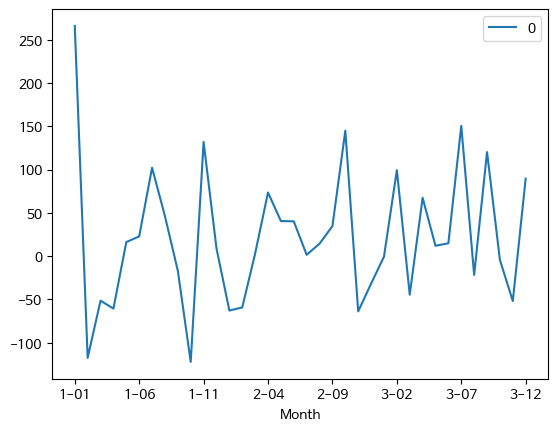

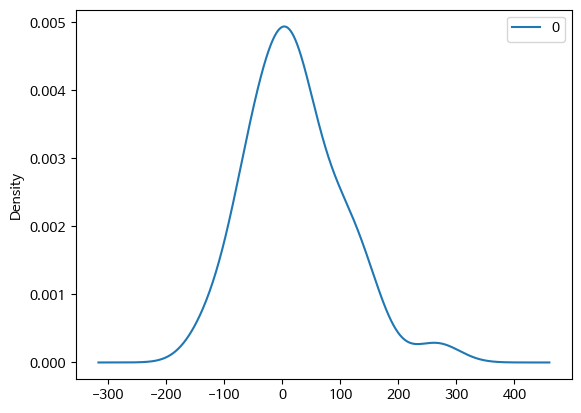

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


In [ ]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

- partitioning후 예측

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('shampoo.txt', header=0, index_col=0)

# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()


In [ ]:
for t in range(len(test)):
  model = ARIMA(history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))


<ipython-input-63-a6e185a41f7e>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220221, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231275, expected=475.300000
predicted=672.914944, expected=581.300000
predicted=531.541449, expected=646.900000


Test RMSE: 89.021


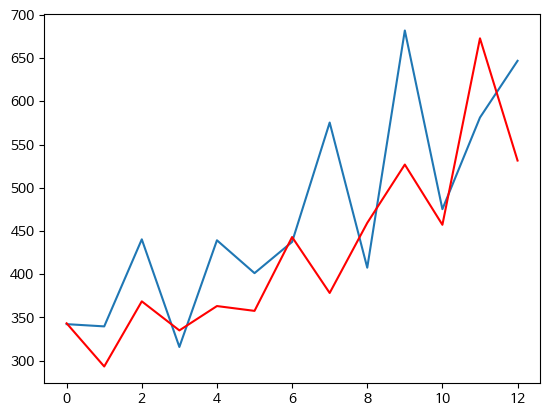

In [ ]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

- 주가 시계열 데이터에 대한 예

In [ ]:
import pandas as pd
data=pd.read_csv('AMZN.csv', header=0,index_col="Date")
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2019-04-17 to 2020-04-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8+ KB


,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,1864.800556,1883.242064,1846.651429,1866.393093,1866.393093,4.060800e+06
std,110.513502,116.543016,110.148293,114.338644,114.338644,2.035731e+06
min,1641.510010,1725.000000,1626.030029,1676.609985,1676.609985,8.813000e+05
25%,1778.007507,1793.577515,1762.510040,1783.422516,1783.422516,2.748850e+06
50%,1842.005005,1870.639954,1826.875000,1854.284973,1854.284973,3.410900e+06
75%,1921.224945,1936.729981,1898.567535,1912.812469,1912.812469,4.754375e+06
max,2346.000000,2461.000000,2335.000000,2408.189941,2408.189941,1.556730e+07


In [ ]:
print(data.head())

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-04-17  1872.989990  1876.469971  1860.439941  1864.819946  1864.819946   
2019-04-18  1868.790039  1870.819946  1859.479980  1861.689941  1861.689941   
2019-04-22  1855.400024  1888.420044  1845.640015  1887.310059  1887.310059   
2019-04-23  1891.199951  1929.260010  1889.579956  1923.770020  1923.770020   
2019-04-24  1925.000000  1929.689941  1898.160034  1901.750000  1901.750000   

             Volume  
Date                 
2019-04-17  2893500  
2019-04-18  2749900  
2019-04-22  3373800  
2019-04-23  4640400  
2019-04-24  3675800  


In [ ]:
data.shape

(252, 6)

In [ ]:
# amazon.com의 close 컬럼을 사용하여 sequence를 만들기 (make_sequence, time step=....
x_train, y_train = make_sequence( data.Close.values, 3)
x_train = x_train.reshape( -1, 3, 1)
y_train = y_train.reshape( -1, 1)

# 1.5 처음부터225개까지가 train, 226~252까지 test
x_train2 = x_train[ : 225]
y_train2 = y_train[ : 225]
x_test = x_train[ 225: ]
y_test = y_train[ 225: ]

In [ ]:
!pip install -U pykrx

from pykrx import stock

stock1 = stock.get_market_ticker_name("000660")
stock1

df = stock.get_market_ohlcv_by_date("20210104", "20211231", "005930")
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume', "Change"]
df
data=df

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 25.1 MB/s eta 0:00:00


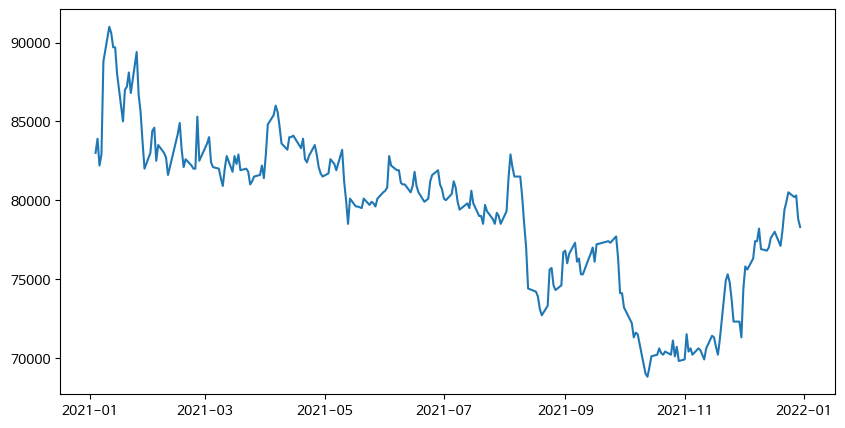

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(data['Close'])
plt.show()

In [ ]:
#shampoo.txt의 sales 값에 대해서 ARIMA를 적용해보세요.
from statsmodels.tsa.stattools import adfuller    #종가의 정상성 여부 점검
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd  #데이터프레임.diff()

In [ ]:
#AMZN.csv를 읽으셔서->Adj.Close값에 대해서 ARIMA 피팅해보세요.
data0 = pd.read_csv("AMZN.csv")
data0.shape

In [ ]:
data = data0.iloc[0:240,:]
test = data0.iloc[240:, :]
data.columns
adfuller(data["Adj Close"].diff().dropna()) #d:1
series = data["Adj Close"].diff().dropna()
plot_acf(series)  #q: 2
plot_pacf( series ) #p: 2

In [ ]:
#p,d,q = (1,1,1)
model1 = ARIMA( data["Adj Close"], order=(3,1,1)).fit()
print(model1.summary())
#SARIMAX, LSTM, GRU....

In [ ]:
np.mean( (model1.forecast(12) - test["Adj Close"])**2 )**0.5 #RMSE

234.71192982342941

In [ ]:
#!pip install statsmodels
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller    #종가의 정상성 여부 점검
result=adfuller(data['Close'])
print(result) #0.5933이 p-value, 비정상 시계열

(-1.8660739163103446, 0.34818538521662656, 0, 247, {'1%': -3.457105309726321, '5%': -2.873313676101283, '10%': -2.5730443824681606}, 3830.8195835262513)


- acf, pacf
 - acf: 자기상관함수, autocorrelation function, k기간 떨어진 값들의 상관 계수
 - pacf: 편자기상관함수, partial autocorrelation function, 서로 다른 두 지점 사이의 관계를 분석할때, 중간에 있는 값들의 영향을 제외시킨 상관계수

 - p가 증가 시, 지수적 감소 혹은 절단 형태여야 정상성, 둘 중 하나라도 느리게 감소하거나 증가 시 비정상성

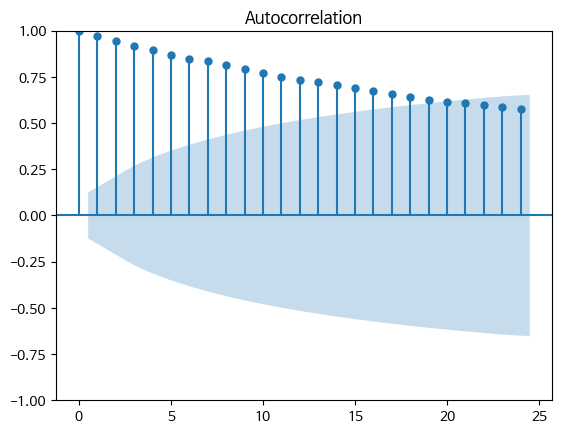

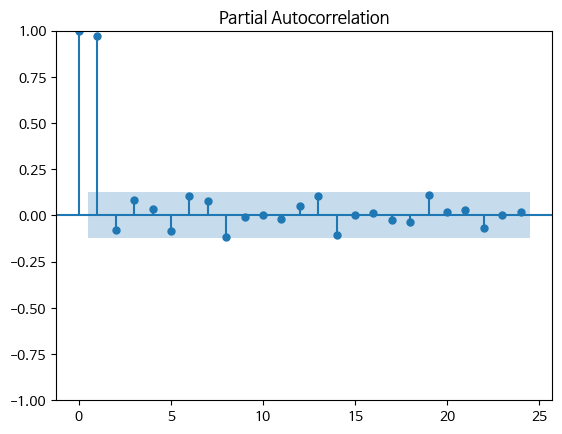

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['Close']) #느리게 감소, 비정상시계열
plot_pacf(data['Close'])
plt.show()

In [ ]:
data.diff() #differencing 차이를 구해줌 ->주가가 아닌 경우에 사용

,Open,High,Low,Close,Volume,Change
날짜,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,600.0,-500.0,1400.0,900.0,-3319607.0,-1.384798
2021-01-06,1700.0,600.0,500.0,-1700.0,6753344.0,-3.110559
2021-01-07,-500.0,-300.0,600.0,700.0,-9444371.0,2.877803
2021-01-08,500.0,5800.0,300.0,5900.0,26368665.0,6.265427
...,...,...,...,...,...,...
2021-12-24,400.0,800.0,900.0,600.0,-1491118.0,0.121216
2021-12-27,400.0,-200.0,-400.0,-300.0,-1303012.0,-1.123609
2021-12-28,-400.0,-200.0,-100.0,100.0,7442957.0,0.497359


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


             Open        High         Low       Close      Volume      Change
count  247.000000  247.000000  247.000000  247.000000  247.000000  132.000000
mean    -0.000106   -0.000242   -0.000107   -0.000236   -0.004044         NaN
std      0.015147    0.013912    0.012226    0.013617    0.283487         NaN
min     -0.040052   -0.057402   -0.045330   -0.035591   -0.858579        -inf
25%     -0.007996   -0.007348   -0.006969   -0.007339   -0.185996   -1.102321
50%      0.000000    0.000000   -0.001219   -0.001234    0.002140   -0.090192
75%      0.007371    0.006873    0.005063    0.007221    0.176373    0.692529
max      0.077361    0.072837    0.075398    0.068752    0.833300         inf


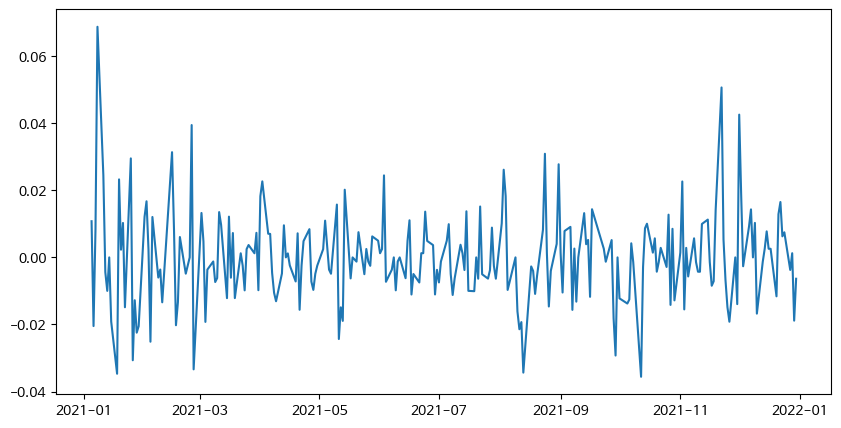

In [ ]:
import numpy as np
datapct=data.pct_change()   #주가인 경우 수익율
logreturn=np.log(1+datapct) #로그수익율
logreturn.head()
print(logreturn.describe())
plt.figure(figsize=(10,5))
plt.plot(logreturn['Close'])
plt.show()

In [ ]:
logreturn.dropna()  #NAN을 제거

,Open,High,Low,Close,Volume,Change
날짜,,,,,,
2021-01-05,0.007380,-0.005942,0.017306,0.010785,-0.089790,-0.822899
2021-01-08,0.006020,0.066615,0.003621,0.068752,0.592082,2.123148
2021-01-11,0.077361,0.072837,0.075398,0.024473,0.425443,-1.055247
2021-01-13,-0.005552,-0.002191,0.014698,-0.009983,-0.299888,0.815336
2021-01-14,-0.012325,-0.013245,-0.004499,0.000000,-0.312294,-inf
...,...,...,...,...,...,...
2021-12-17,-0.021894,-0.006390,-0.007782,0.002567,0.088675,-0.002574
2021-12-22,0.012755,0.013951,0.016635,0.016508,0.182996,0.249477
2021-12-23,0.011342,0.007528,0.006325,0.006277,-0.231009,-0.972020


In [ ]:
from statsmodels.tsa.stattools import adfuller
logreturn=logreturn.dropna()
result=adfuller(logreturn['Close']) #p-value < 0.05
print(result)

(-9.289815856154789, 1.1881075485800211e-15, 0, 131, {'1%': -3.481281802271349, '5%': -2.883867891664528, '10%': -2.5786771965503177}, -695.3238392201392)


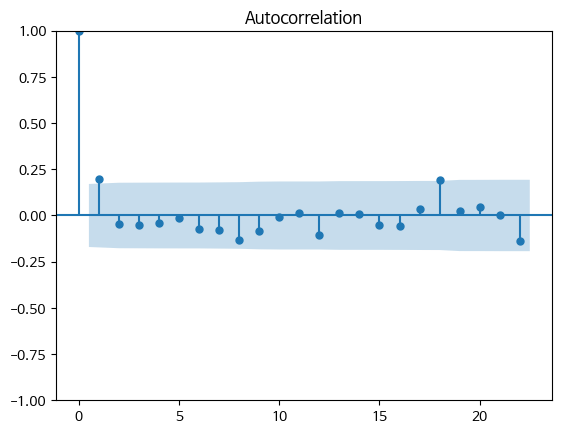

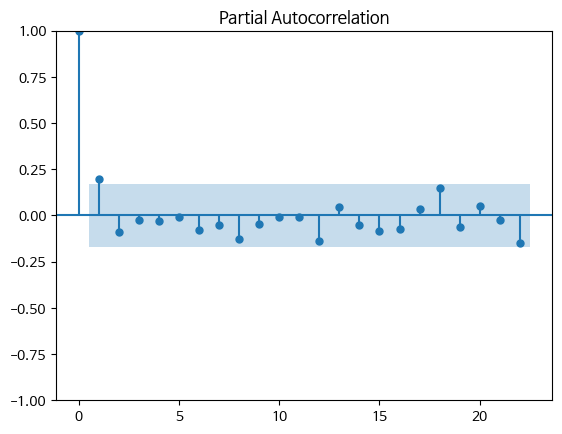

<class 'pandas.core.frame.DataFrame'>


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(logreturn['Close'])
plot_pacf(logreturn['Close']) #그림에서 절단이 일어나는 위치를 p의 값으로 지정, 24?
plt.show()
print(type(logreturn))

In [ ]:
#위에서 정의했던 make_sequence함수를 사용 가능
logr1=logreturn['Close'].values
print(type(logr1))
print(logr1.shape)
logr=logr1.reshape(1,-1)
print(logr.shape)
inte=13 #pacf의 p값
x=[]
y=[]
for i in range(logr.shape[1]):
    if i+inte>logr.shape[1]-1:
        break
    else:
         xx=logr[0,i:i+inte]
         x.append(xx)
         yy=logr[0,i+inte]
         y.append(yy)
print(type(x))
print(type(y))
x=np.array(x)
y=np.array(y)
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)
x_train=x[:100]
x_test=x[100:]
y_train=y[:100]
y_test=y[100:]

<class 'numpy.ndarray'>
(132,)
(1, 132)
<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(119, 13)
(119,)


In [ ]:
#원래 시계열에서 q=2, 위의 그림에서 d=1
#ARIMA(0, 1, 2)
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Close'], order=(0,2,1))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  248
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -2146.450
Date:                Mon, 27 May 2024   AIC                           4296.900
Time:                        23:42:17   BIC                           4303.911
Sample:                             0   HQIC                          4299.723
                                - 248                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0549      0.009     -5.776      0.000      -0.073      -0.036
sigma2      2.183e+06   1.38e+05     15.812      0.000    1.91e+06    2.45e+06
Ljung-Box (L1) (Q):                  38.70   Jarque-

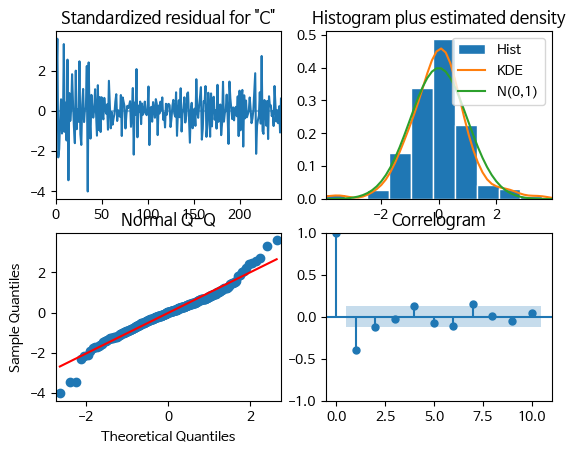

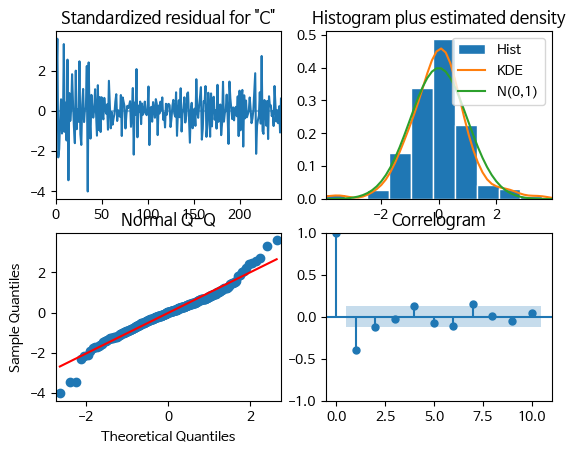

In [ ]:
model_fit.plot_diagnostics()

In [ ]:
forecasted = model_fit.forecast(steps=1)
print(forecasted)

248    77749.893373
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


#4.Auto arima

- SARIMAX(Seasonal Auto Regressive Integrated Moving Average) : 계절 자기회귀 누적이동평균 모형
 - 추세 및 계절성분이 있는 단변량 시계열에 적합
 - ARIMA 모형은 일반적으로 추세에만 적용, 계절성을 띄는 데이터의 경우 계절차분을 실시하는 SARIMA를 사용하는 것이 효과적
 - 계절 차분: 관측치와, 같은 계절의 이전 관측치의 차이 의미. m(계절 주기) 주기를 제하여서 m 차분
 - SARIMA 모형은 ARIMA 모형에 계절적 성분을 추가한 모형, 데이터의 주기(s or m)를 설정하여 SARIMA 모형을 적합(각 계절에 따른 독립적인 ARIMA 모형이 합쳐짐)
 - 기존 모형의 비계절성 부분을 나타내는 부분은 소문자 기호, 계절성 부분을 나타내는 부분은 대문자 기호:  ARIMA(p,d,q)(P,D,Q)s
 - s 값은 월별 계절성을 나타낼 때 s=12, 분기별 계절성을 나타낼 때 s=4 등

- 자동으로 p,d, q 확인

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.0 MB/s eta 0:00:00


In [ ]:
#AMZN.csv의 Close 값에 대해서 ARIMA
data = pd.read_csv("AMZN.csv")
series = data["Close"]

In [ ]:
# import necessary libraries
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

data_actual = series

# set seasonal to True
seasonal = True

# use pmdarima to automatically select best ARIMA model
model = pm.auto_arima(data_actual,
#                      m=12,               # frequency of series
#                      seasonal=seasonal,  # TRUE if seasonal series
                      d=0,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0, start_q=0, # minimum p and q
                      max_p=5, max_q=5, # maximum p and q
                      D=None,             # let model determine 'D'
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

# print model summary
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3106.682, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2527.511, Time=0.24 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2872.291, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4514.094, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2527.409, Time=1.74 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2520.533, Time=6.47 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=2516.528, Time=1.63 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=2518.505, Time=4.54 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=2518.260, Time=8.46 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2516.742, Time=7.34 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=2520.198, Time=12.70 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=8.86 sec

Best model:  ARIMA(4,0,0)(0,0,0)[0] intercept
Total fit time: 52.414 seconds
                               SARIMAX Results                                
Dep. Variabl

In [ ]:
#daily-min-temperatures.csv
#autoarima 모델링
data = pd.read_csv("daily-min-temperatures.csv")
data_actual = data.Temp[0:3600]
data_predict = data.Temp[3600:]

# use pmdarima to automatically select best ARIMA model
model = pm.auto_arima(data_actual,
                      d=0,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0, start_q=0, # minimum p and q
                      max_p=5, max_q=5, # maximum p and q
                      D=None,             # let model determine 'D'
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
# print model summary
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20342.390, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=17041.607, Time=0.45 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=18312.895, Time=1.59 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=28030.284, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=17022.640, Time=3.34 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=16890.667, Time=3.85 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=16807.032, Time=5.24 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=16747.049, Time=8.28 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=16560.562, Time=15.45 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=16558.643, Time=9.43 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=16556.654, Time=16.82 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=16611.457, Time=6.62 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=16558.644, Time=13.84 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=16560.666, Time=9.83 sec
 ARIMA(4,0,2)(0,

In [ ]:
pred = model.predict(n_periods=20)
#print(pred, data_predict[0:20])
root_mean_squared_error( pred, data_predict[0:20]   )

2.149534005283384

In [ ]:
X,y = make_sequence( data_actual, 5)
print(X.shape, y.shape)
from sklearn.neural_network import MLPRegressor
ml = MLPRegressor()
ml.fit(X, y)

In [ ]:
X_test, y_test = make_sequence( data_predict.values, 5)
y_pred = ml.predict(X_test)
#print(y_pred, y_test)
root_mean_squared_error( y_pred[0:20], y_test[0:20])

2.7183915354764374